# Bit Plane Slicing

Bit-plane slicing is a technique used in digital image processing to analyze the individual bits in the pixel values, where each pixel is represented by a binary number, commonly using 8 bits for grayscale images or 24 bits for color images. The process of bit-plane slicing involves separating and displaying each bit of the pixel values as a separate image. It creates a set of binary images, each corresponding to a single bit of the original pixel values. The most significant bit (MSB) is the leftmost bit, representing the highest order bit; the least significant bit (LSB) is the rightmost bit, representing the lowest order bit.

## Import necessary libraries

In [1]:
# Importing modules from skimage to read and display images
import skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import resize
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('skimage version:', skimage.__version__)

skimage version: 0.24.0


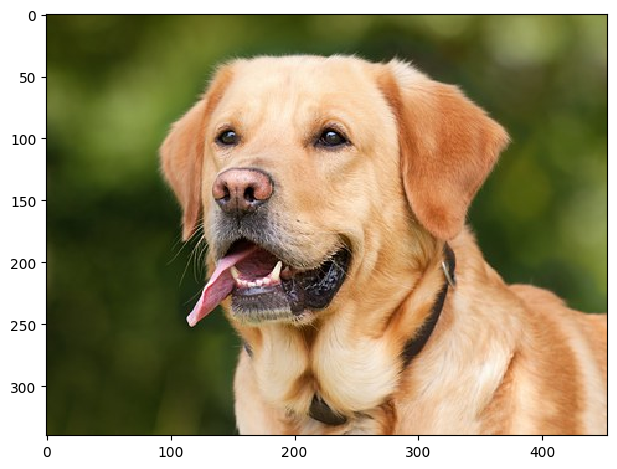

In [2]:
# Read the image
image = imread('images/dog.jpg')

# Load the image
imshow(image)

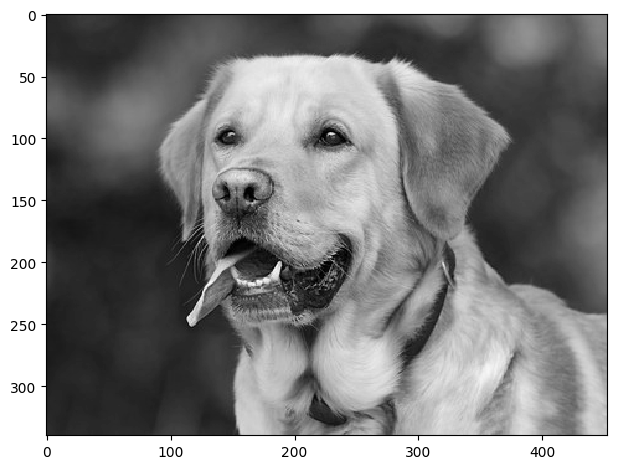

In [3]:
# Converting into a grayscale image
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the image
imshow(grayscale)

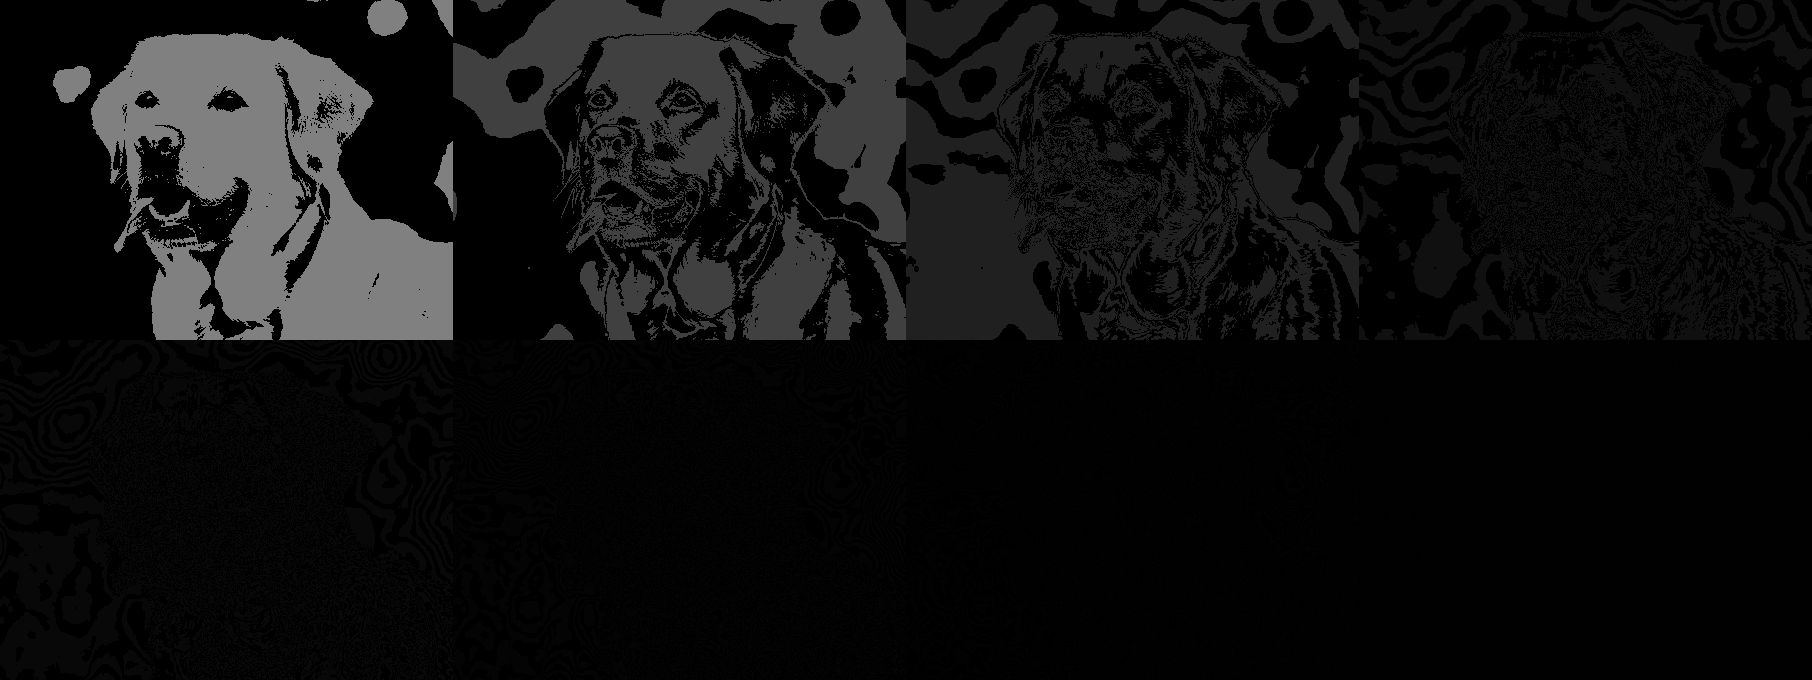

In [13]:
import numpy as np
import cv2

lst = []
for i in range(grayscale.shape[0]):
    for j in range(grayscale.shape[1]):
         lst.append(np.binary_repr(grayscale[i][j] ,width=8)) # width = no. of bits

eight_bit_img = (np.array([int(i[0]) for i in lst], dtype = np.uint8) * 128).reshape(grayscale.shape[0],grayscale.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst], dtype = np.uint8) * 64).reshape(grayscale.shape[0],grayscale.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst], dtype = np.uint8) * 32).reshape(grayscale.shape[0],grayscale.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst], dtype = np.uint8) * 16).reshape(grayscale.shape[0],grayscale.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst], dtype = np.uint8) * 8).reshape(grayscale.shape[0],grayscale.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst], dtype = np.uint8) * 4).reshape(grayscale.shape[0],grayscale.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst], dtype = np.uint8) * 2).reshape(grayscale.shape[0],grayscale.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst], dtype = np.uint8) * 1).reshape(grayscale.shape[0],grayscale.shape[1])

finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv = cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])

# Vertically concatenate
final = cv2.vconcat([finalr,finalv])

# Display the images
cv2_imshow(final)